## DS102 Project :Analysis of Elon Musk's tweet and prediction of Tesla stock price based on the sentiment of his tweets.


Name: Hui Jia Shun | Chen LiangRui <br>
Class: 3 March 2019 7.00pm

## Problem statement


It is observed that Tesla's stocks have been rising rapidly through the years and it has been greatly attributed to its CEO, Elon Musk. We would like to see how vital of a role Elon is in the valuation of his company, Tesla. We determine his influence through the sentiment of his tweets.

## Hypothesis

It is our speculation that the price of Tesla stocks are positively correlated with the nature or the sentiment of Elon's tweets. We believe that if Elon tweets something relatively positive, he will inspire confidence in investors which results in the prices rising. If he tweets something negative, Tesla's stock price will drop. 

## Dataset

The dataset that is selected is from Kaggle. One of it is Tesla stock prices through the years and the other with Elon Musk's Tweet. Because we are trying to find out how the tweets affect the stock price, we primarily use these two datasets. The links are provided below:<br>
https://www.kaggle.com/kulgen/elon-musks-tweets<br>
https://www.kaggle.com/rpaguirre/tesla-stock-price

## 1. Importing the relevant libraries

In this project, we heavily rely on the library nltk and scikitlearn to do text analysis and stock prediction.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,words
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download("words")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gavin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gavin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Gavin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gavin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gavin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Gavin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

## 2. Reading csv into dataframe

First we read the dataset with Tesla's stock price.

In [4]:
df=pd.read_csv("Tesla.csv") 
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


Next we read the dataset with Elon Musk's tweets. When completing this task, there is an error reading the csv file. We dubugged it using the encoding parameter available for this function.

In [5]:
df2=pd.read_csv("data_elonmusk.csv",encoding='unicode_escape')
df2.head()

,row ID,Tweet,Time,Retweet from,User
0,Row0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,Row1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,Row2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Row3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Row4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk


## 3. Adjusting the date to be in the similiar format 

To align both dataframes, we change the order of the dates to something similiar among both dataframes. So we change df['Date'] to something similiar to df2['Date'] format. 

In [6]:
df['Date']=pd.to_datetime(df.Date)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


As the dataset comes with the dates with a timing format, we want to have it by the date because the dataframe with the stock prices have the dates column without time. 

In [7]:
df2['Date'] = pd.to_datetime(df2['Time']).dt.normalize()

We then drop the irrelevant rows to facilitate readibility.<br>
Warning: Run the following code only once as the code will produce an error as it has already dropped the columns and it will not detect any columns to drop if the code is running, giving an error. If you run the code again, restart the kernel and re-run the whole notebook.

In [8]:
df2=df2.drop(columns='Time' )
df2=df2.drop(columns='row ID' )

In [9]:
df2.head()

,Tweet,Retweet from,User,Date
0,@MeltingIce Assuming max acceleration of 2 to ...,NaN,elonmusk,2017-09-29
1,RT @SpaceX: BFR is capable of transporting sat...,SpaceX,elonmusk,2017-09-29
2,@bigajm Yup :),NaN,elonmusk,2017-09-29
3,Part 2 https://t.co/8Fvu57muhM,NaN,elonmusk,2017-09-29
4,Fly to most places on Earth in under 30 mins a...,NaN,elonmusk,2017-09-29


## 4. Data cleaning and sentiment analysis

Now we try to remove stopwords, usernames and symbols to get the most accurate sentiment analysis of his tweets as possible .  

We start by removing all the symbols. Twitter uses the '@' symbol to tag a particular user and a '#' to tag a following topic. These symbols are irrelevant to the analysis of the tweets. 

In [10]:
df2['Tweet'] = df2['Tweet'].str.replace('\W', ' ')
df2.head()

,Tweet,Retweet from,User,Date
0,MeltingIce Assuming max acceleration of 2 to ...,NaN,elonmusk,2017-09-29
1,RT SpaceX BFR is capable of transporting sat...,SpaceX,elonmusk,2017-09-29
2,bigajm Yup,NaN,elonmusk,2017-09-29
3,Part 2 https t co 8Fvu57muhM,NaN,elonmusk,2017-09-29
4,Fly to most places on Earth in under 30 mins a...,NaN,elonmusk,2017-09-29


We then proceed to remove stopwords in the tweets as they do not show any sentiment of the tweet. 

In [28]:
df2["Tweet"].dtype

dtype('O')

In [11]:
stop = stopwords.words('english')
df2['Tweet']=df2['Tweet'].str.lower()
df2['Tweet']=df2['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df2.head()

,Tweet,Retweet from,User,Date
0,meltingice assuming max acceleration 2 3 g com...,NaN,elonmusk,2017-09-29
1,rt spacex bfr capable transporting satellites ...,SpaceX,elonmusk,2017-09-29
2,bigajm yup,NaN,elonmusk,2017-09-29
3,part 2 https co 8fvu57muhm,NaN,elonmusk,2017-09-29
4,fly places earth 30 mins anywhere 60 cost per ...,NaN,elonmusk,2017-09-29


We then proceed to removing words that are not english. The purpose of this step is to remove twitter names which sometimes can affect the accuracy of the sentiment analysis as the names can be misleading. For example, the user could have a negative tweet but with a twitter name like @joyfulhappy, it can affect the sentiment analysis. (Might take some time to load as there are many words in the tweets to compare with every word in the english language)

In [12]:
english_words = words.words()
df2['Tweet']=df2['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word  in (english_words)]))
df2.head()

,Tweet,Retweet from,User,Date
0,assuming acceleration g comfortable direction ...,NaN,elonmusk,2017-09-29
1,capable transporting orbit crew cargo moon,SpaceX,elonmusk,2017-09-29
2,,NaN,elonmusk,2017-09-29
3,part,NaN,elonmusk,2017-09-29
4,fly earth anywhere cost per seat,NaN,elonmusk,2017-09-29


Finally we approach the sentiment analysis to get our score. We are only interested in the compound score as we require 
a value to be plotted that states the overall sentiment of a tweet. 

In [13]:
sid= SentimentIntensityAnalyzer()
df2['Tweet Sentiment score']= df2['Tweet'].apply(sid.polarity_scores)
df2['Tweet Sentiment score'] = [d.get('compound') for d in df2['Tweet Sentiment score']]
df2.head(20)

,Tweet,Retweet from,User,Date,Tweet Sentiment score
0,assuming acceleration g comfortable direction ...,NaN,elonmusk,2017-09-29,0.7003
1,capable transporting orbit crew cargo moon,SpaceX,elonmusk,2017-09-29,0.3818
2,,NaN,elonmusk,2017-09-29,0.0000
3,part,NaN,elonmusk,2017-09-29,0.0000
4,fly earth anywhere cost per seat,NaN,elonmusk,2017-09-29,0.0000
5,supporting creation permanent self sustaining ...,SpaceX,elonmusk,2017-09-29,0.6124
6,take anywhere earth less,NaN,elonmusk,2017-09-29,0.0000
7,city opposite earth dawn dusk sky blue day sky...,NaN,elonmusk,2017-09-29,0.0000
8,moon base alpha,NaN,elonmusk,2017-09-29,0.0000
9,something really special today talk,NaN,elonmusk,2017-09-29,0.4576


## 5. Wordcloud

We are curious of what are the most common topics that Elon tweets about. So we created a wordcloud to find out. 

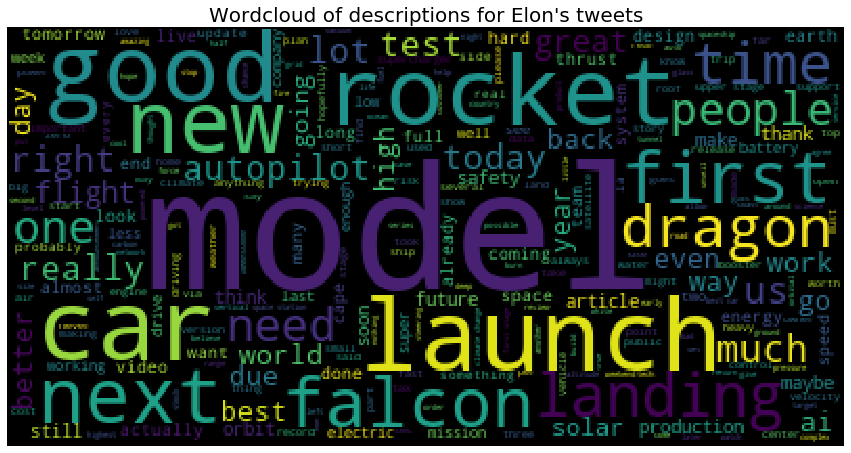

In [14]:
wordcloud=df2.copy()
wordcloudtweet=wordcloud['Tweet']
wordcloudtweet=wordcloudtweet.tolist()
wordcloudlist=[]
for items in wordcloudtweet:
    wordcloudlist.append(items)

long_str_descriptions = ''
for tweets in wordcloudlist:
    long_str_descriptions+=tweets
long_str_descriptions

plt.figure(figsize=(15,8))
desc_wordcloud = WordCloud(
    width=400, height=200,
    background_color="black", 
    max_words=300, relative_scaling = 1.0).generate(long_str_descriptions)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of descriptions for Elon's tweets", fontsize=20)
plt.show()

Based on the result, we can see that the main topics that he frequently talks about are mainly in the field of engineering. He is known for being the CEO of Tesla and Spacex. Through our analysis, he is probably tweeting mainly about spacex and tesla's activities and updates.

## 6. Data visualisation

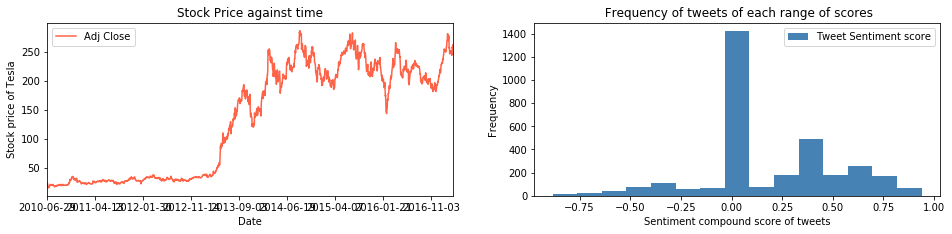

In [15]:
fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)



df.plot(kind='line',x='Date', y='Adj Close', title='Stock Price against time', 
        ax=ax1, color="tomato")
ax1.set_ylabel('Stock price of Tesla')

df2.plot(kind='hist', bins = 15, x='Date', y='Tweet Sentiment score', title=' Frequency of tweets of each range of scores',
         ax=ax2,color='steelblue')
ax2.set_xlabel('Sentiment compound score of tweets')

plt.show()



## 7. Analysis

We focus on the price change of the stock to accurately find the relationship between the tweet sentiment score and the change in stock price.

In [16]:
#a copy of df, now with new column
df_change=df.copy()
df_change['Difference']=df_change['Adj Close'].diff()

#formed a new df from the intersect of stock data and sentiment if they have common dates
df3=df2.groupby(['Date']).sum().reset_index()
df3=df3.set_index('Date').join(df_change.set_index('Date'), how='inner')
df3=df3.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])

df3.head()

,Tweet Sentiment score,Adj Close,Difference
Date,,,
2012-11-16,0.3612,31.840000,1.020000
2012-11-19,0.6697,32.919998,1.079998
2012-11-20,0.3042,33.000000,0.080002
2012-11-21,0.7717,32.470001,-0.529999
2012-11-23,0.7783,32.130001,-0.340000


Scatter plot of stock difference and sentiment score

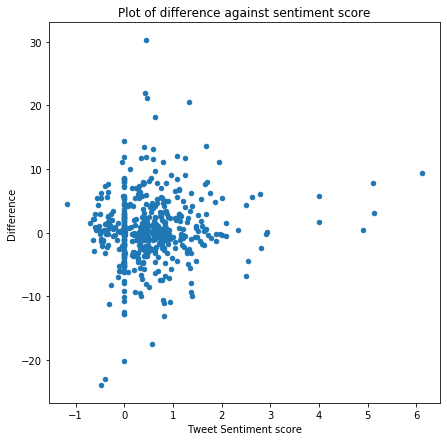

In [17]:
df3.plot(kind='scatter', 
                    x='Tweet Sentiment score', y='Difference',
                    figsize=(7, 7),
                    title='Plot of difference against sentiment score')
plt.show()

We compare the correlation between the the difference in the stock price with the tweet sentiment score and it shows a positive correlation of 0.122. This indicates that his tweets affects the price but in a relatively small amount. 

In [18]:
df3.corr()

,Tweet Sentiment score,Adj Close,Difference
Tweet Sentiment score,1.000000,-0.058789,0.122052
Adj Close,-0.058789,1.000000,0.020291
Difference,0.122052,0.020291,1.000000


Describing df3 will then show the overall statistics of his tweets and the difference in the stock price per day. 

In [19]:
df3.describe()

,Tweet Sentiment score,Adj Close,Difference
count,527.000000,527.000000,527.000000
mean,0.523023,187.801556,0.488539
std,0.789038,68.118310,5.309495
min,-1.171200,31.840000,-24.000000
25%,0.000000,166.870002,-1.979996
50%,0.401900,207.889999,0.240001
75%,0.812350,231.720001,2.704995
max,6.114600,284.119995,30.350006


Looking into the amount of outliers for the stock price changes. 

In [20]:
q25= df3['Difference'].quantile(0.25)
q75= df3['Difference'].quantile(0.75)
iqr=q75-q25
lower_bound = q25 -(1.5 * iqr) 
upper_bound = q75 +(1.5 * iqr) 
amt_of_outliers=len(df3[(df3['Difference']>upper_bound)|(df3['Difference']<lower_bound)])
print(amt_of_outliers)

39


Plotting a boxplot to visualise the outliers of the stock changes. 

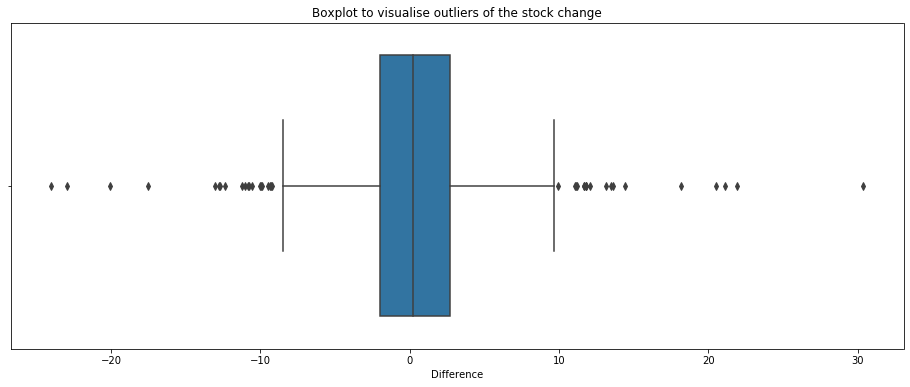

In [21]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot()
ax=sns.boxplot(x="Difference",data=df3)
ax.set_title("Boxplot to visualise outliers of the stock change")
plt.show()

Deriving the amount of outliers of the tweet sentiment scores.

In [22]:
q25= df3['Tweet Sentiment score'].quantile(0.25)
q75= df3['Tweet Sentiment score'].quantile(0.75)
iqr=q75-q25
lower_bound = q25 -(1.5 * iqr) 
upper_bound = q75 +(1.5 * iqr) 
amt_of_outliers=len(df3[(df3['Tweet Sentiment score']>upper_bound)|(df3['Tweet Sentiment score']<lower_bound)])
print(amt_of_outliers)

17


Plotting a boxplot to visualise the outliers for the sentiment score. 

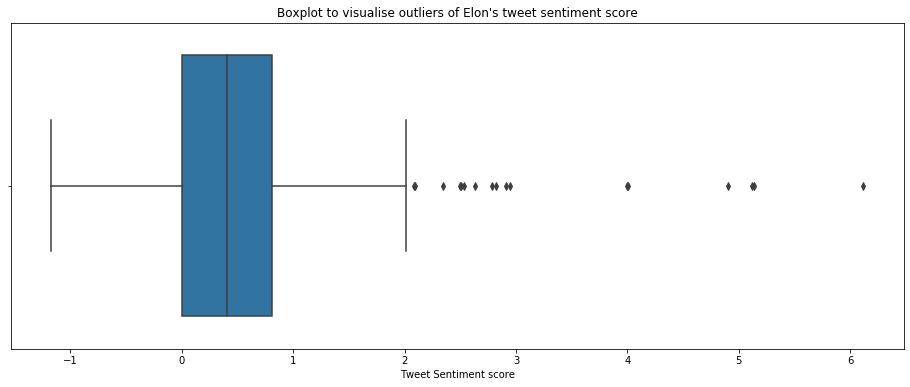

In [23]:
fig=plt.figure(figsize=(16,6))
ax=fig.add_subplot()
ax=sns.boxplot(x="Tweet Sentiment score",data=df3)
ax.set_title("Boxplot to visualise outliers of Elon's tweet sentiment score")
plt.show()

## 8. Building a linear regression model for stock prediction

Train and test the model to give stock prediction when a sentiment is keyed in 

In [24]:
#model training
X = df3['Tweet Sentiment score']
y = df3['Difference']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


# Create the Model using training data
model = sm.OLS(y_train, X_train)

# Fit the dataset
result = model.fit()

# Print the summary results
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Difference   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):              0.016
Method:                 Least Squares   F-statistic:                              7.396
Date:                Sat, 14 Mar 2020   Prob (F-statistic):                     0.00683
Time:                        21:22:13   Log-Likelihood:                         -1230.4
No. Observations:                 395   AIC:                                      2463.
Df Residuals:                     394   BIC:                                      2467.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tweet Sentiment score     0.8143      0.299      2.720      0.007       0.226       1.403
==============================================================================
Omnibus:                       62.270   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.629
Skew:                           0.435   Prob(JB):                     5.03e-89
Kurtosis:                       7.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
df3['Predicted Difference'] = result.fittedvalues
df3.head()

,Tweet Sentiment score,Adj Close,Difference,Predicted Difference
Date,,,,
2012-11-16,0.3612,31.840000,1.020000,NaN
2012-11-19,0.6697,32.919998,1.079998,NaN
2012-11-20,0.3042,33.000000,0.080002,0.247702
2012-11-21,0.7717,32.470001,-0.529999,NaN
2012-11-23,0.7783,32.130001,-0.340000,NaN


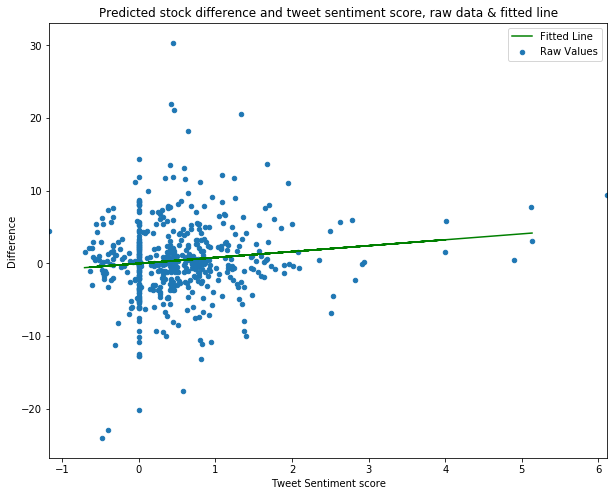

In [26]:
# Plot the dataset and the fitted line.
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)
df3.plot(kind='scatter', x='Tweet Sentiment score', y='Difference', ax=ax1)

# Plot the fitted line here
#
df3.plot(kind = 'line', x = 'Tweet Sentiment score', y = 'Predicted Difference', ax=ax1, color = 'green')

# Update the legend and add a title
ax1.legend(['Fitted Line', 'Raw Values'])
plt.title("Predicted stock difference and tweet sentiment score, raw data & fitted line")
plt.show()

### Prediction and future usage

In [27]:
#in the future, we just have to substitute a corresponding sentiment value to obtain a stock fluctuation

X2 = pd.Series({'Tweet Sentiment score': 1.5})
result.predict(X2)

Tweet Sentiment score    1.221411
dtype: float64

To improve the model in the future, we can expand the training dataframe using new tweets and their corresponding stock changes, thus obtaining a more accurate prediction model.

## 9. Executive Summary

Elon's tweets are generally rather positive as seen from the scatter plot above, it clusters mainly around the range from 0 to 1 for the tweet sentiment score. The line plotted also shows a postive gradient between the tweets. Through this analysis, we conclude that there is a positive correlation between the stock price and the sentiment of his tweets. 
We can also conclude that the stock price of Tesla has a steady fluctuation of prices with an average of positive increment.